<a href="https://colab.research.google.com/github/egustavo20/dataset_datascience/blob/master/Data_Storytelling%E2%80%8A_%E2%80%8AAn%C3%A1lise_de_pre%C3%A7o_do_combust%C3%ADvel_no%C2%A0Brasil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [ ]:
#TRABALHANDO A ESTRUTURA DOS DADOS
df = pd.read_csv('/content/Master_data.csv', sep=';',encoding='cp1252',usecols=[1,2,3,4,5,6,7,8,10,9,11])
df['Valor de Compra'] = df['Valor de Compra'].str.replace(',','.').astype('float64')
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.').astype('float64')
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'],format="%d/%m/%Y")


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df[['Região - Sigla','Estado - Sigla','Município','Revenda','CNPJ da Revenda','Produto','Data da Coleta','Valor de Compra','Valor de Venda','Unidade de Medida','Bandeira']]

In [ ]:
df['Mês'] = df['Data da Coleta'].dt.strftime('%b-%y')
df['Dia_sem'] = df['Data da Coleta'].dt.weekday
df['Mês_num']= df['Data da Coleta'].dt.month
df['Ano']= df['Data da Coleta'].dt.year

df = df.sort_values(by=['Ano','Mês_num'],ascending=True)

In [ ]:
df['Valor de Compra'] = df['Valor de Compra'].fillna(df['Valor de Compra'].mean(0))
df['Valor de Venda'] = df['Valor de Venda'].fillna(df['Valor de Venda'].mean(0))

In [ ]:
df.head(5)

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Compra,Valor de Venda,Unidade de Medida,Bandeira,Mês,Dia_sem,Mês_num,Ano
0,CO,DF,BRASILIA,AUTO POSTO 306 NORTE LTDA,22398818000147,ETANOL,2019-07-03,2.687500,2.989,R$ / litro,RAIZEN,Jul-19,2,7,2019
1,CO,DF,BRASILIA,AUTO POSTO CHAVES LTDA,746278000102,ETANOL,2019-07-03,3.303585,3.099,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,Jul-19,2,7,2019
2,CO,DF,BRASILIA,AUTO POSTO EIXINHO LTDA,5470808000156,ETANOL,2019-07-03,3.303585,3.090,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,Jul-19,2,7,2019
3,CO,DF,BRASILIA,AUTO POSTO ESQUINA LIMITADA,2551867000160,ETANOL,2019-07-03,2.767900,3.089,R$ / litro,BRANCA,Jul-19,2,7,2019
4,CO,DF,BRASILIA,AUTO POSTO JB LIMITADA,672345000191,ETANOL,2019-07-03,3.303585,3.087,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.,Jul-19,2,7,2019


In [ ]:
df.shape

(623470, 15)

In [ ]:
df.isnull().sum()

Região - Sigla       0
Estado - Sigla       0
Município            0
Revenda              0
CNPJ da Revenda      0
Produto              0
Data da Coleta       0
Valor de Compra      0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
Mês                  0
Dia_sem              0
Mês_num              0
Ano                  0
dtype: int64

In [ ]:
df.dtypes

Região - Sigla               object
Estado - Sigla               object
Município                    object
Revenda                      object
CNPJ da Revenda               int64
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Compra             float64
Valor de Venda              float64
Unidade de Medida            object
Bandeira                     object
Mês                          object
Dia_sem                       int64
Mês_num                       int64
Ano                           int64
dtype: object

In [ ]:
df.describe()

,CNPJ da Revenda,Valor de Compra,Valor de Venda,Dia_sem,Mês_num,Ano
count,6.234700e+05,623470.000000,623470.000000,623470.000000,623470.000000,623470.000000
mean,2.130292e+13,3.303585,3.722254,1.305287,6.561265,2019.533273
std,2.338956e+13,0.282347,0.560939,1.047758,3.309848,0.498892
min,1.388000e+09,1.555300,1.799000,0.000000,1.000000,2019.000000
25%,5.076816e+12,3.303585,3.690000,0.000000,4.000000,2019.000000
50%,1.099050e+13,3.303585,3.722254,1.000000,7.000000,2020.000000
75%,2.741914e+13,3.303585,3.970000,2.000000,9.000000,2020.000000
max,9.874986e+13,5.003700,5.899000,4.000000,12.000000,2020.000000


In [ ]:
de = df[(df['Valor de Venda']>3.5) & (df['Valor de Venda']<=4.5) & (df['Valor de Compra']>3.4) & (df['Valor de Compra']<=4.3)]

In [ ]:
de.describe()

In [ ]:
EIX = df.groupby('Mês')['Valor de Compra','Ano','Mês_num'].mean()
COM = df.groupby('Mês')['Valor de Compra'].mean()
VEN = df.groupby('Mês')['Valor de Venda'].mean()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
EIX = EIX.sort_values(by=['Ano','Mês_num'],ascending=True)
EIX = EIX.index

In [ ]:
A = VEN.mean()
B = COM.mean()
T = COM.value_counts().sum()
PER = ((A/B)-1)*100
RESL = PER - 12.6

In [ ]:
T= T.astype(str)
A ="R$"[0:4]+str(A)[0:4]
B ="R$"[0:4]+str(B)[0:4]
PER =str(PER)[0:4]+"%"[0:1]
RESL =str(RESL)[0:4]+"%"[0:1]

In [ ]:
PER

'12.6%'

In [ ]:
# configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

# definindo cores do gráfico
CINZA1, CINZA2, CINZA3= '#646369', '#A6A6A5','#BFBEBE'
AZUL1, AZUL2 = "#174A7E", '#4A81BF'

#Eixo principal
labels = EIX

In [ ]:
# ajustes para construir o gráfico
x = np.arange(len(labels))
width_bar = 0.35

# definir cores por plot
cores_antes = [AZUL1, AZUL1, AZUL1, AZUL1, AZUL1]
cores_depois = [CINZA2, CINZA2, CINZA2, CINZA2, CINZA2]

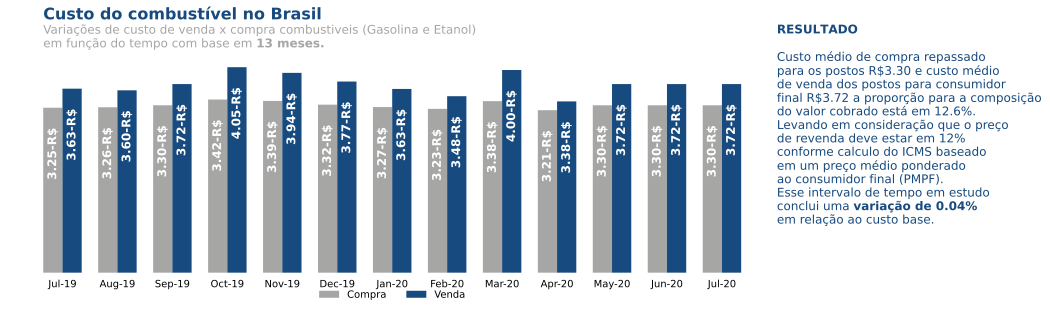

In [ ]:
#PLOTANDO GRÁFICO 1
fig, ax= plt.subplots(figsize=(14.7,4.5))

# plotar antes e depois saparadamente
rects3 = ax.bar(x - width_bar/2, COM, width_bar, label='Compra', color=cores_depois)
rects4 = ax.bar(x + width_bar/2, VEN, width_bar, label='Venda', color=cores_antes)

ax.legend()
plt.legend(ncol=2,frameon=False,bbox_to_anchor=(0.5, 0.002), loc='upper center', borderaxespad=1.4)


# labels do eixo
x = np.arange(len(labels))
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_ylabel('Porcentagem')

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

#criar função para dar labels automaticamente
def autolabel(rects3):
    for rect in rects3:
        height = rect.get_height()
        ax.annotate(
                    '{:.2f}'.format(height)+"-R$",
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    fontweight='bold',
                    ha='center',
                    va='top',
                    rotation=90,
                    fontsize=12,
                    color="white",
                    )

# plotar labels dentro das barras
autolabel(rects3)
autolabel(rects4)


# plotar título
plt.text(-0.35, 5.0, 'Custo do combustível no Brasil',
         fontsize=16, 
         color=AZUL1,
         weight='bold')

# plotar subtitulo
plt.text(-0.35,4.9,
         "Variações de custo de venda x compra combustiveis (Gasolina e Etanol)\n"
         "em função do tempo com base em "+'$\\bf{\}$'+str(T)+" meses.",
         verticalalignment="top",
         fontsize=12,
         color=CINZA2)

# plotar anotações do resultado da campanha
plt.text(13.0,4.9,
         "$\\bf{RESULTADO}$\n"
         "\n"
         "Custo médio de compra repassado\n"
         "para os postos "+str(B)+" e custo médio\n"
         "de venda dos postos para consumidor \n"
         "final "+str(A)+" a proporção para a composição\n"
         "do valor cobrado está em "+str(PER)+"."
         "\n"
         "Levando em consideração que o preço\n"
         "de revenda deve estar em 12%\n"
         "conforme calculo do ICMS baseado\n"
         "em um preço médio ponderado\n"
         "ao consumidor final (PMPF).\n"
         "Esse intervalo de tempo em estudo\n"
         "conclui uma " +'$\\bf{\}$'"variação de "+str(RESL)+"\n"
         "em relação ao custo base."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL1)

# plotar o gráfico
fig.tight_layout()
plt.show()

In [ ]:
NAME_GAS = df.loc[df['Produto']=='GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean()
VEN_GAS = df.loc[df['Produto']=='GASOLINA'].groupby('Mês')['Valor de Venda'].mean()
NAME_ETA = df.loc[df['Produto']=='ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean()
VEN_ETA = df.loc[df['Produto']=='ETANOL'].groupby('Mês')['Valor de Venda'].mean()

In [ ]:
#GASOLINA
A2 = VEN_GAS.head(3)
A2first = NAME_GAS.sort_values(ascending=False).head(4).keys()
A2last = NAME_GAS.sort_values(ascending=False).tail(3).keys()
#ALCOOL
A3 = VEN_ETA.head(3)
A3first = NAME_ETA.sort_values(ascending=False).head(4).keys()
A3last = NAME_ETA.sort_values(ascending=False).tail(3).keys()

In [ ]:
GS_M = NAME_GAS.mean()
ET_M = NAME_ETA.mean()
M2 =  NAME_GAS.sort_values(ascending=False).head(4).mean()
M3 =  NAME_ETA.sort_values(ascending=False).head(4).mean()

In [ ]:
PER2 = ((ET_M/GS_M))*100

In [ ]:
PER2

88.66931327159014

In [ ]:
A2first = A2first[0]+"-"+A2first[1]+"-"+A2first[2]+"-"+A2first[3]
A3first = A3first[0]+"-"+A3first[1]+"-"+A3first[2]+"-"+A3first[3]

In [ ]:
ET_M ="R$"[0:4]+str(ET_M)[0:4]
GS_M ="R$"[0:4]+str(GS_M)[0:4]
M2 ="R$"[0:4]+str(M2)[0:4]
M3 ="R$"[0:4]+str(M3)[0:4]
PER2 =str(PER2)[0:4]+"%"[0:1]

In [ ]:
postos = df.groupby('Bandeira')['Valor de Venda'].mean()
postos.sort_values(ascending=False)
# definindo cores do gráfico
CINZA1, CINZA2, CINZA3 = '#646369', '#A6A6A5','#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'

In [ ]:
ET = df[(df['Produto']=='ETANOL')].groupby('Estado - Sigla')['Valor de Venda'].mean()
GS = df[(df['Produto']=='GASOLINA')].groupby('Estado - Sigla')['Valor de Venda'].mean()

# definir cores por plot
cores_antes = [AZUL1, AZUL1, AZUL1, AZUL1, AZUL2,AZUL2, AZUL2, AZUL2, AZUL2, AZUL2,AZUL3, AZUL3, AZUL3, AZUL3, AZUL3,AZUL3, AZUL3, AZUL4, AZUL4, AZUL4,AZUL4,CINZA1, CINZA1, CINZA1,  CINZA2, CINZA2,CINZA3]
cores_depois = [AZUL1, AZUL1, AZUL1, AZUL1, AZUL2,AZUL2, AZUL2, AZUL2, AZUL2, AZUL2,AZUL3, AZUL3, AZUL3, AZUL3, AZUL3,AZUL3, AZUL3, AZUL4, AZUL4, AZUL4,AZUL4,CINZA1, CINZA1, CINZA1,  CINZA2, CINZA2,CINZA3]

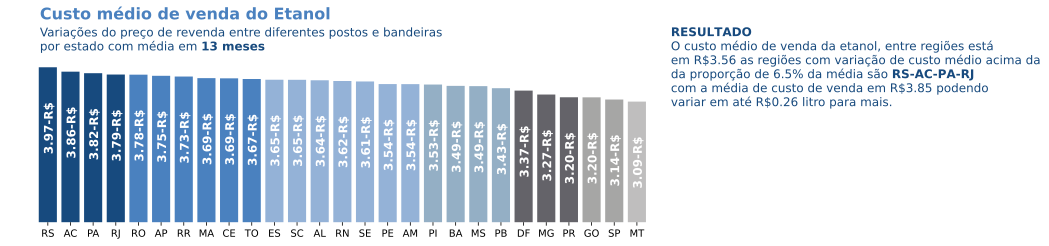

In [ ]:
#PLOTANDO GRÁFICO 2

ET.sort_values(ascending=False,inplace=True)
GS.sort_values(ascending=False,inplace=True)

fig, ax1= plt.subplots(figsize=(12,3))

rects1 = ax1.bar(ET.keys(),ET,color=cores_antes)


#Removendo bordas do quadro
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


#Removendo eixos y dos gráficos
ax1.axes.get_yaxis().set_visible(False)


#Criar função para dar labels automaticamente
def plot_value_labels(axis):
    rects = axis.patches

    # Para cada barra: coloque um rótulo
    for rect in rects:
        #  Obtenha o posicionamento X e Y do rótulo do reto
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() 

        label ='{:.2f}'.format(y_value)+"-R$"

        # Alinhamento vertical para valores positivos
        va = 'top'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -2
            # Vertically align label at top
            va = 'top'

        # Create annotation
        ax1.annotate(label, (x_value, y_value), 
                      xytext=(-7.5, -35), 
                      textcoords="offset points",
                      fontweight='bold',
                    ha='center',
                    va='top',
                    rotation=90,
                    fontsize=12,
                    color="white",) 
          
# plotar título
plt.text(-0.35, 5.2, 'Custo médio de venda do Etanol',
         fontsize=16, 
         color=AZUL2,
         weight='bold')

# plotar subtitulo
plt.text(-0.35,5.0,
         "Variações do preço de revenda entre diferentes postos e bandeiras\n"
         "por estado com média em "+'$\\bf{\}$'+str(T)+" meses",
         verticalalignment="top",
         fontsize=12,
         color=AZUL1)

# plotar anotações do resultado da campanha
plt.text(27.5,5.0,
         "$\\bf{RESULTADO}$\n"
         "O custo médio de venda da etanol, entre regiões está\n"
         "em "+str(ET_M)+" as regiões com variação de custo médio acima da\n"
         "da proporção de 6.5% da média são "+'$\\bf{\}$'+str(A3first)+"\n"
         "com a média de custo de venda em "+str(M3)+" podendo\n"
         "variar em até R$0.26 litro para mais.",
         verticalalignment="top",
         fontsize=12,
         color=AZUL1)

        


# call the function we defined
plot_value_labels(plt.gca())

plt.show()


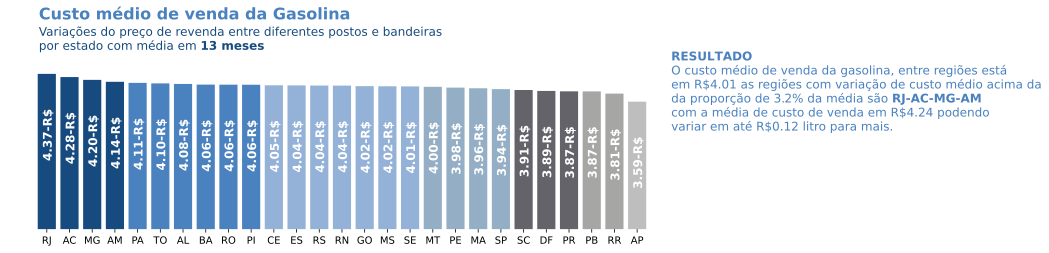

In [ ]:
#PLOTANDO GRÁFICO 3

ET.sort_values(ascending=False,inplace=True)
GS.sort_values(ascending=False,inplace=True)

fig, ax1= plt.subplots(figsize=(12,3))

rects1 = ax1.bar(GS.keys(),GS,color=cores_antes)


#Removendo bordas do quadro
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


#Removendo eixos y dos gráficos
ax1.axes.get_yaxis().set_visible(False)


#Criar função para dar labels automaticamente
def plot_value_labels(axis):
    rects = axis.patches

    # Para cada barra: coloque um rótulo
    for rect in rects:
        #  Obtenha o posicionamento X e Y do rótulo do reto
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() 

        label ='{:.2f}'.format(y_value)+"-R$"

        # Alinhamento vertical para valores positivos
        va = 'top'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -2
            # Vertically align label at top
            va = 'top'

        # Create annotation
        ax1.annotate(label, (x_value, y_value), 
                      xytext=(-7.5, -35), 
                      textcoords="offset points",
                      fontweight='bold',
                    ha='center',
                    va='top',
                    rotation=90,
                    fontsize=12,
                    color="white",) 
          
# plotar título
plt.text(-0.35, 5.9, 'Custo médio de venda da Gasolina',
         fontsize=16, 
         color=AZUL2,
         weight='bold')

# plotar subtitulo
plt.text(-0.35,5.7,
         "Variações do preço de revenda entre diferentes postos e bandeiras\n"
         "por estado com média em "+'$\\bf{\}$'+str(T)+" meses",
         verticalalignment="top",
         fontsize=12,
         color=AZUL1)

# plotar anotações do resultado da campanha
plt.text(27.5,5.0,
         "$\\bf{RESULTADO}$\n"
         "O custo médio de venda da gasolina, entre regiões está\n"
         "em "+str(GS_M)+" as regiões com variação de custo médio acima da\n"
         "da proporção de 3.2% da média são "+'$\\bf{\}$'+str(A2first)+"\n"
         "com a média de custo de venda em "+str(M2)+" podendo\n"
         "variar em até R$0.12 litro para mais."
         ,
         verticalalignment="top",
         fontsize=12,
         color=AZUL2)

     


# call the function we defined
plot_value_labels(plt.gca())

 

plt.show()

In [ ]:
DE = df[(df['Produto']=='GASOLINA')].groupby('Estado - Sigla')['Valor de Venda'].mean()
DE.sort_values(ascending=False)

In [ ]:

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


In [ ]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [ ]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [ ]:
A = 5.0
A = str(A)

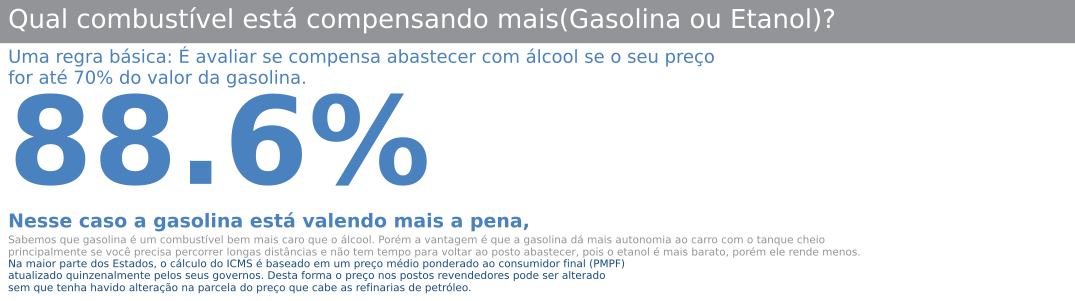

In [ ]:
# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')


# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

# titile the plot
plt.text(-0.15, 1.0,
         'Qual combustível está compensando mais(Gasolina ou Etanol)? '+' '*27,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'})


# footnote with the data source
plt.text(-0.15, 0.01,
         'Na maior parte dos Estados, o cálculo do ICMS é baseado em um preço médio ponderado ao consumidor final (PMPF)\n'
         'atualizado quinzenalmente pelos seus governos. Desta forma o preço nos postos revendedores pode ser alterado\n'
         'sem que tenha havido alteração na parcela do preço que cabe as refinarias de petróleo.',
         fontsize=10.5,
         color=AZUL1) 

# add note to the plot
plt.text(-0.15, 0.79,
         'Uma regra básica: É avaliar se compensa abastecer com álcool se o seu preço\n'
         'for até 70% do valor da gasolina.',
         fontsize=18,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.41,
         '$\\bf{\}$'+str(PER2), # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.25,
         # use mathtext \\bf for bold text
         '$\\bf{Nesse\ caso\ a\ gasolina\ está\ valendo\ mais\ a\ pena,}$',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.10,
         'Sabemos que gasolina é um combustível bem mais caro que o álcool. Porém a vantagem é que a gasolina dá mais autonomia ao carro com o tanque cheio\n'
         'principalmente se você precisa percorrer longas distâncias e não tem tempo para voltar ao posto abastecer, pois o etanol é mais barato, porém ele rende menos.\n'
         ,
         fontsize=10.5,
         color=GRAY7)

plt.show()